### area_comparison_histograms - Analyze distribution of outwash and overwash metrics 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from scipy import stats
from CoreBx_funcs import UTM2Island

In [2]:
outdir = 'C:/crs/proj/2019_DorianOBX/Dorian_paper_analyses/figs/'

#### Import Jin-Si's washover/washout statistics for Dorian  
Calculate the statistics

In [3]:
dbd = pd.read_csv('C:/crs/proj/2019_DorianOBX/Dorian_paper_analyses/Washover_Washout_NCB_Statistics_Dorian.csv')
dbd['w_over_l']=dbd['Width_m']/dbd['Length_m']
# dbd['a_over_p2']=dbd['Shape_Area']/dbd['Perimeter_m']**2
# dbd['a_over_p2_norm']=dbd['Shape_Area']/dbd['Perimeter_m']**2*(4*np.pi)
dbd['R1']=4*np.pi*dbd['Shape_Area']/dbd['Perimeter_m']**2
dbd['R2']=dbd['Shape_Area']/dbd['Convex_Hull_Area']
dbds=dbd.describe()
dbds

,Dorian ID,Shape_Area,Perimeter_m,MIN_elev,MAX_elev,RANGE_elev,MEAN_elev,STD_elev,Volume_m3,CENTROID_X,...,Throat_m,Connected to Backbarrier [0 = yes],Type,Convex_Hull_Area,Convex_Hull_perimeter_m,Polygon_area_outside_overwash_m2,%outwash in overwash,w_over_l,R1,R2
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,50.168675,13357.244786,1720.486859,-3.470172,0.351663,3.821835,-1.100236,0.613746,-17530.628328,392330.831751,...,64.133614,0.951807,1.771084,20974.742418,477.022081,6409.451807,64.329398,0.613155,0.083084,0.602176
std,24.349998,16971.915496,1586.776354,1.349506,1.940630,2.437991,0.318790,0.201362,22576.012524,4696.150438,...,68.057895,0.215475,0.887931,24247.659837,317.529910,8820.152373,22.101518,0.162062,0.079704,0.115664
min,9.000000,45.170473,36.527037,-6.367895,-0.187000,0.517050,-1.620925,0.097495,-104763.000700,383981.399700,...,6.780000,0.000000,1.000000,53.871173,28.741685,0.000000,19.060000,0.255422,0.012837,0.381996
25%,29.500000,1309.232949,399.729079,-4.577519,0.012000,2.528500,-1.347768,0.496177,-23602.502290,388246.370450,...,20.600000,1.000000,1.000000,2580.625425,205.174807,133.650000,45.655000,0.486736,0.036557,0.517498
50%,50.000000,7192.257659,1335.763816,-3.555000,0.078000,3.701071,-1.175950,0.657948,-8017.533042,392907.803600,...,48.800000,1.000000,2.000000,13812.626360,459.433534,2870.500000,65.770000,0.640233,0.055660,0.597392
75%,70.500000,18258.678585,2352.407206,-2.488837,0.185500,4.839880,-0.889854,0.778154,-973.725797,396416.720250,...,72.550000,1.000000,2.000000,28888.340255,679.038933,9474.150000,83.590000,0.734440,0.103506,0.683845
max,92.000000,88995.590510,6901.773506,-0.621050,17.687000,21.242000,-0.301134,0.962666,-26.074226,400258.308500,...,446.000000,1.000000,5.000000,107869.518900,1349.089879,34979.900000,100.000000,0.924252,0.425437,0.855975


In [4]:
print('Total connected to backbarrier:',83-np.sum(dbd['Connected to Backbarrier [0 = yes]']))
print('Total with area beyond overwash: ',np.sum(dbd['Polygon_area_outside_overwash_m2']>0))
print(79/83)

Total connected to backbarrier: 4
Total with area beyond overwash:  79
0.9518072289156626


#### Import Jin-Si's washover/washout statistics for Dorian  
Calculate the statistics

In [5]:
dbf = pd.read_csv('C:/crs/proj/2019_DorianOBX/Dorian_paper_analyses/Washover_Washout_NCB_Statistics_Florence.csv',skiprows=2,header=0)
dbf['w_over_l']=dbf['MBG_Width']/dbf['MBG_Length']
#dbf['a_over_p2']=dbf['Shape_Area_m']/dbf['Shape_perimeter_m']**2
dbf['R1']=4*np.pi*dbf['Shape_Area_m']/dbf['Shape_perimeter_m']**2
dbf['R2']=dbf['Shape_Area_m']/dbf['Convex_Hull_Area_m2']
dbfs=dbf.describe()
dbfs

,Florence Overwash ID,Dorian_binary,Centroid_X,Centroid_Y,Shape_perimeter_m,Shape_Area_m,MBG_Width,MBG_Length,Throat_m,Convex Hull_perimeter_m,Convex_Hull_Area_m2,w_over_l,R1,R2
count,111.000000,111.000000,111.000000,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,57.657658,0.657658,391137.360981,3.868215e+06,1565.782014,12673.461908,96.549647,241.682496,98.632162,505.898318,21709.691889,0.559434,0.085827,0.579176
std,33.169673,0.476645,5926.089304,5.473164e+03,3013.451748,26146.119446,61.096158,478.646847,157.671245,586.542395,51839.919319,0.181496,0.058858,0.116472
min,1.000000,0.000000,380207.238900,3.858298e+06,157.808411,145.659988,13.846546,33.205957,3.790000,78.021790,317.196433,0.032513,0.003024,0.301969
25%,29.500000,0.000000,387144.318600,3.864328e+06,576.387205,2241.907830,51.212225,104.363271,20.105000,273.583332,4311.111658,0.439194,0.047695,0.477289
50%,58.000000,1.000000,391942.656200,3.869034e+06,871.958331,4650.751583,83.309062,139.837405,41.900000,366.098833,8759.753020,0.540934,0.074076,0.575528
75%,85.500000,1.000000,395707.862750,3.872432e+06,1620.711681,14138.391045,126.711906,209.571405,112.390000,571.670337,21036.654245,0.698171,0.109456,0.668015
max,114.000000,1.000000,400797.350000,3.877069e+06,30259.207780,220349.238100,344.391763,4267.202497,1000.000000,5617.065085,491720.906400,0.909101,0.323881,0.815257


#### Need to include this total area statistic, and also calculate these areas as fraction/percentage of island platform

In [6]:
AF = np.sum(dbf['Shape_Area_m'].values)
AD = np.sum(dbd['Shape_Area'].values)
print('Total area of Florence overwash: {:.0f} m^2:'.format( AF ))
print('Total area of Dorian outwash   : {:.0f} m^2:'.format( AD ))
print('AF/AD: ',AF/AD)

Total area of Florence overwash: 1406754 m^2:
Total area of Dorian outwash   : 1108651 m^2:
AF/AD:  1.2688879271156113


In [7]:
#### Load Lazarus overwash data

In [8]:
fn='Lazarus_Supp.csv'
dbl = pd.read_csv('C:/crs/proj/2019_DorianOBX/Dorian_paper_analyses/'+fn,header=0)
dbls=dbf.describe()
dbls

,Florence Overwash ID,Dorian_binary,Centroid_X,Centroid_Y,Shape_perimeter_m,Shape_Area_m,MBG_Width,MBG_Length,Throat_m,Convex Hull_perimeter_m,Convex_Hull_Area_m2,w_over_l,R1,R2
count,111.000000,111.000000,111.000000,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,57.657658,0.657658,391137.360981,3.868215e+06,1565.782014,12673.461908,96.549647,241.682496,98.632162,505.898318,21709.691889,0.559434,0.085827,0.579176
std,33.169673,0.476645,5926.089304,5.473164e+03,3013.451748,26146.119446,61.096158,478.646847,157.671245,586.542395,51839.919319,0.181496,0.058858,0.116472
min,1.000000,0.000000,380207.238900,3.858298e+06,157.808411,145.659988,13.846546,33.205957,3.790000,78.021790,317.196433,0.032513,0.003024,0.301969
25%,29.500000,0.000000,387144.318600,3.864328e+06,576.387205,2241.907830,51.212225,104.363271,20.105000,273.583332,4311.111658,0.439194,0.047695,0.477289
50%,58.000000,1.000000,391942.656200,3.869034e+06,871.958331,4650.751583,83.309062,139.837405,41.900000,366.098833,8759.753020,0.540934,0.074076,0.575528
75%,85.500000,1.000000,395707.862750,3.872432e+06,1620.711681,14138.391045,126.711906,209.571405,112.390000,571.670337,21036.654245,0.698171,0.109456,0.668015
max,114.000000,1.000000,400797.350000,3.877069e+06,30259.207780,220349.238100,344.391763,4267.202497,1000.000000,5617.065085,491720.906400,0.909101,0.323881,0.815257


#### Fit lines to data and plot

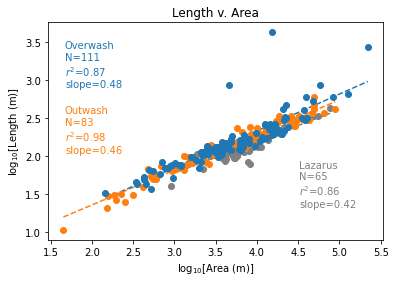

In [9]:
title='Length v. Area'
figname = 'log10_length_v_area.svg'
xf = np.log10(dbf['Shape_Area_m'])
yf = np.log10(dbf['MBG_Length'])
xd = np.log10(dbd['Shape_Area'])
yd = np.log10(dbd['Length_m'])
xl = np.log10(dbl['CB_05_area'])
yl = np.log10(dbl['CB_05_length'])
# get rid of NaNs in Lazarus data
xl = xl[~np.isnan(yl)]
yl = yl[~np.isnan(yl)]


gradientl, interceptl, r_valuel, p_valuel, std_errl = stats.linregress(xl,yl)
mn=np.min(xl)
mx=np.max(xl)
x1l=np.linspace(mn,mx,10)
y1l=gradientl*x1l+interceptl


gradientf, interceptf, r_valuef, p_valuef, std_errf = stats.linregress(xf,yf)
mn=np.min(xf)
mx=np.max(xf)
x1f=np.linspace(mn,mx,10)
y1f=gradientf*x1f+interceptf

gradientd, interceptd, r_valued, p_valued, std_errd = stats.linregress(xd,yd)
mn=np.min(xd)
mx=np.max(xd)
x1d=np.linspace(mn,mx,10)
y1d=gradientd*x1d+interceptd

ts = 'Overwash\nN={:.0f}\n$r^2$={:.2f}\nslope={:.2f}'.format( len(xf),r_valuef,gradientf)
ts2 = 'Outwash\nN={:.0f}\n$r^2$={:.2f}\nslope={:.2f}'.format( len(xd),r_valued,gradientd)
ts3 = 'Lazarus\nN={:.0f}\n$r^2$={:.2f}\nslope={:.2f}'.format( len(xl),r_valuel,gradientl)

fig, ax = plt.subplots(ncols=1)
ax.plot(x1l,y1l,'--',c='gray')
ax.plot(x1d,y1d,'--',c='tab:orange')
ax.plot(x1f,y1f,'--',c='tab:blue')

plt.text(x=.05, y=.7, s=ts, fontsize=10, c='tab:blue',transform=ax.transAxes)
plt.text(x=.05, y=.4, s=ts2, fontsize=10, c='tab:orange',transform=ax.transAxes)
plt.text(x=.75, y=.15, s=ts3, fontsize=10, c='gray',transform=ax.transAxes)

ax.plot(xl,yl,'o',c='gray',label='Lazarus')
ax.plot(xd,yd,'o',c='tab:orange',label='Outwash')
ax.plot(xf,yf,'o',c='tab:blue',label='Overwash')
plt.title(title)
#ax.legend()
plt.xlabel('log$_{10}$[Area (m)]')
plt.ylabel('log$_{10}$[Length (m)]')
plt.savefig(outdir+figname,dpi=200)

#### Use a different Ordinary Least Squares (OLS) package that returns more statistics to evalulate

In [10]:
# Florence overwash
X = xf
Y = yf
print('Results with no intercept"')
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())
# next line required to produce a model with an intercept
print('Results with intercept:')
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

Results with no intercept"
                                 OLS Regression Results                                
Dep. Variable:             MBG_Length   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          1.685e+04
Date:                Thu, 20 Jan 2022   Prob (F-statistic):                   3.45e-122
Time:                        17:06:18   Log-Likelihood:                          34.070
No. Observations:                 111   AIC:                                     -66.14
Df Residuals:                     110   BIC:                                     -63.43
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
------------

In [11]:
# Dorian outwash
X = xd
Y = yd
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Length_m   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1627.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           2.19e-55
Time:                        17:06:18   Log-Likelihood:                 94.070
No. Observations:                  83   AIC:                            -184.1
Df Residuals:                      81   BIC:                            -179.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4368      0.043     10.198      0.0

In [12]:
# Lazurus overwash
X = xl
Y = yl
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           CB_05_length   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     178.8
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           4.63e-20
Time:                        17:06:18   Log-Likelihood:                 68.577
No. Observations:                  65   AIC:                            -133.2
Df Residuals:                      63   BIC:                            -128.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5289      0.118      4.467      0.0

In [13]:
# Both Dorian and Florence fit together
X = np.concatenate((xf,xd))

Y = np.concatenate((yf,yd))
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1006.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           2.85e-78
Time:                        17:06:18   Log-Likelihood:                 108.90
No. Observations:                 194   AIC:                            -213.8
Df Residuals:                     192   BIC:                            -207.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4210      0.056      7.552      0.0

In [14]:
# Both Dorian and Florence and Eli's data fit together
X = np.concatenate((xf,xd,xl))

Y = np.concatenate((yf,yd,yl))
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1116.
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.75e-95
Time:                        17:06:18   Log-Likelihood:                 152.28
No. Observations:                 259   AIC:                            -300.6
Df Residuals:                     257   BIC:                            -293.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4308      0.052      8.275      0.0

#### Thoughts on the fits
* Since the std err for the slopes and intercepts encompass all of the values, there is no significant diff between these fits. I think we can say that, but it would be nice to be able to mention some arcane (to me) statistical test.
* Same goes when you fit all together. 

Null hypothesis that distributions are equal can be rejected if p is small.
p = 0.636


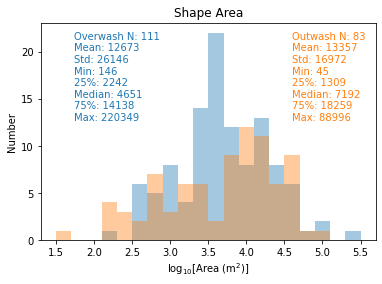

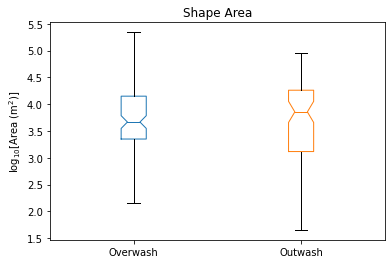

In [15]:
colname = 'Shape_Area_m'
colname2 = 'Shape_Area'
title='Shape Area'
figname = 'shape_area.svg'

data = np.log10(dbf[colname].values)
data2 = np.log10(dbd[colname2].values)

u, p = stats.mannwhitneyu(data, data2)
print('Null hypothesis that distributions are equal can be rejected if p is small.')
print('p = {:.3f}'.format(p))

fig, ax1 = plt.subplots(ncols=1)
bins = np.arange(1.5,5.6,.2)
_ = ax1.hist(data, bins=bins, histtype='stepfilled', alpha=0.4)
_ = ax1.hist(data2, bins=bins, histtype='stepfilled', alpha=0.4)

plt.title(title)
ts = "Overwash N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    dbfs[colname]['count'],dbfs[colname]['mean'],dbfs[colname]['std'],\
    dbfs[colname]['min'],dbfs[colname]['25%'],dbfs[colname]['50%'],dbfs[colname]['75%'],dbfs[colname]['max'])
ts2 = "Outwash N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    dbds[colname2]['count'],dbds[colname2]['mean'],dbds[colname2]['std'],\
    dbds[colname2]['min'],dbds[colname2]['25%'],dbds[colname2]['50%'],dbds[colname2]['75%'],dbds[colname2]['max'])
ax1.text(x=.1, y=.55, s=ts, fontsize=10, c='tab:blue',transform=ax1.transAxes)
ax1.text(x=.75, y=.55, s=ts2, fontsize=10, c='tab:orange',transform=ax1.transAxes)

plt.ylabel('Number')
plt.xlabel('log$_{10}$[Area (m$^2$)]')
plt.savefig(outdir+'hist_'+figname,dpi=200)

boxfix, ax = plt.subplots(1,1,sharey=True)
bp=ax.boxplot((data,data2),notch=True)
plt.setp(bp['boxes'][0], color='tab:blue')
plt.setp(bp['medians'][0], color='tab:blue')

plt.setp(bp['boxes'][1], color='tab:orange')
plt.setp(bp['medians'][1], color='tab:orange')

ax.set_xticklabels(('Overwash','Outwash'))
ax.set_ylabel('log$_{10}$[Area (m$^2$)]')
plt.title(title)
plt.savefig(outdir+'box_'+figname,dpi=200)

In [16]:
print(bins)
print(10**bins)
print(10**4.0)

[1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1 4.3 4.5 4.7 4.9
 5.1 5.3 5.5]
[3.16227766e+01 5.01187234e+01 7.94328235e+01 1.25892541e+02
 1.99526231e+02 3.16227766e+02 5.01187234e+02 7.94328235e+02
 1.25892541e+03 1.99526231e+03 3.16227766e+03 5.01187234e+03
 7.94328235e+03 1.25892541e+04 1.99526231e+04 3.16227766e+04
 5.01187234e+04 7.94328235e+04 1.25892541e+05 1.99526231e+05
 3.16227766e+05]
10000.0


Null hypothesis that distributions are equal can be rejected if p is small.
p = 0.561


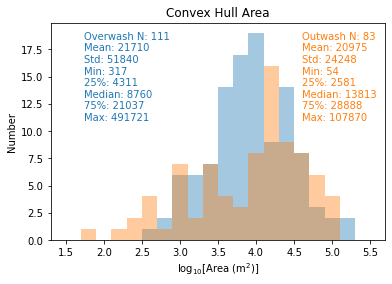

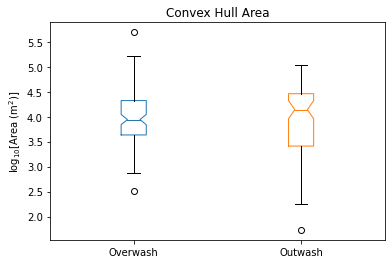

In [17]:
# post Florence
colname = 'Convex_Hull_Area_m2'
# post Dorian
colname2 = 'Convex_Hull_Area'
title='Convex Hull Area'
figname = 'convex_hull_area.svg'
data = np.log10(dbf[colname].values)
data2 = np.log10(dbd[colname2].values)

u, p = stats.mannwhitneyu(data, data2)
print('Null hypothesis that distributions are equal can be rejected if p is small.')
print('p = {:.3f}'.format(p))

fig, ax1 = plt.subplots(ncols=1)
bins = np.arange(1.5,5.6,.2)
_ = ax1.hist(data, bins=bins, histtype='stepfilled', alpha=0.4)
_ = ax1.hist(data2, bins=bins, histtype='stepfilled', alpha=0.4)

ts = "Overwash N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    dbfs[colname]['count'],dbfs[colname]['mean'],dbfs[colname]['std'],\
    dbfs[colname]['min'],dbfs[colname]['25%'],dbfs[colname]['50%'],dbfs[colname]['75%'],dbfs[colname]['max'])
ts2 = "Outwash N: {:.0f}\nMean: {:.0f}\nStd: {:.0f}\nMin: {:.0f}\n25%: {:.0f}\nMedian: {:.0f}\n75%: {:.0f}\nMax: {:.0f}".format(\
    dbds[colname2]['count'],dbds[colname2]['mean'],dbds[colname2]['std'],\
    dbds[colname2]['min'],dbds[colname2]['25%'],dbds[colname2]['50%'],dbds[colname2]['75%'],dbds[colname2]['max'])
ax1.text(x=.1, y=.55, s=ts, fontsize=10, c='tab:blue',transform=ax1.transAxes)
ax1.text(x=.75, y=.55, s=ts2, fontsize=10, c='tab:orange',transform=ax1.transAxes)
plt.title(title)
plt.ylabel('Number')
plt.xlabel('log$_{10}$[Area (m$^2$)]')
plt.savefig(outdir+'hist_'+figname,dpi=200)

boxfix, ax = plt.subplots(1,1,sharey=True)
bp=ax.boxplot((data,data2),notch=True)
plt.setp(bp['boxes'][0], color='tab:blue')
plt.setp(bp['medians'][0], color='tab:blue')

plt.setp(bp['boxes'][1], color='tab:orange')
plt.setp(bp['medians'][1], color='tab:orange')

ax.set_xticklabels(('Overwash','Outwash'))
ax.set_ylabel('log$_{10}$[Area (m$^2$)]')
plt.title(title)
plt.savefig(outdir+'box_'+figname,dpi=200)

Null hypothesis that distributions are equal can be rejected if p is small.
p = 0.047


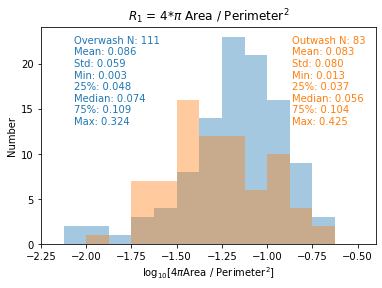

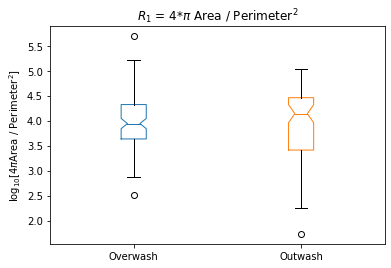

In [18]:

title='$R_1$ = 4*$\pi$ Area / Perimeter$^2$'
figname = 'area_over_perimeter2.svg'
colnamef = 'R1'
colnamed = 'R1'
dataf = np.log10(dbf[colnamef].values)
datad = np.log10(dbd[colnamed].values)

u, p = stats.mannwhitneyu(dataf, datad)
print('Null hypothesis that distributions are equal can be rejected if p is small.')
print('p = {:.3f}'.format(p))

fig, ax1 = plt.subplots(ncols=1)
bins = np.arange(-2.5,-.5,.125)
_ = ax1.hist(dataf, bins=bins, histtype='stepfilled', alpha=0.4)
_ = ax1.hist(datad, bins=bins, histtype='stepfilled', alpha=0.4)

ts = "Overwash N: {:.0f}\nMean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\n25%: {:.3f}\nMedian: {:.3f}\n75%: {:.3f}\nMax: {:.3f}".format(\
    dbfs[colnamef]['count'],dbfs[colnamef]['mean'],dbfs[colnamef]['std'],\
    dbfs[colnamef]['min'],dbfs[colnamef]['25%'],dbfs[colnamef]['50%'],dbfs[colnamef]['75%'],dbfs[colnamef]['max'])
ts2 = "Outwash N: {:.0f}\nMean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\n25%: {:.3f}\nMedian: {:.3f}\n75%: {:.3f}\nMax: {:.3f}".format(\
    dbds[colnamed]['count'],dbds[colnamed]['mean'],dbds[colnamed]['std'],
    dbds[colnamed]['min'],dbds[colnamed]['25%'],dbds[colnamed]['50%'],dbds[colnamed]['75%'],dbds[colnamed]['max'])
ax1.text(x=.1, y=.55, s=ts, fontsize=10, c='tab:blue',transform=ax1.transAxes)
ax1.text(x=.75, y=.55, s=ts2, fontsize=10, c='tab:orange',transform=ax1.transAxes)
plt.title(title)
plt.xlim((-2.25,-.4))
plt.ylabel('Number')
plt.xlabel('log$_{10}$[4$\pi$Area / Perimeter$^2$]')
plt.savefig(outdir+'hist_'+figname,dpi=200)

boxfix, ax = plt.subplots(1,1,sharey=True)
bp=ax.boxplot((data,data2),notch=True)
plt.setp(bp['boxes'][0], color='tab:blue')
plt.setp(bp['medians'][0], color='tab:blue')

plt.setp(bp['boxes'][1], color='tab:orange')
plt.setp(bp['medians'][1], color='tab:orange')

ax.set_xticklabels(('Overwash','Outwash'))
ax.set_ylabel('log$_{10}$[4$\pi$Area / Perimeter$^2$]')
plt.title(title)
plt.savefig(outdir+'box_'+figname,dpi=200)

Null hypothesis that distributions are equal can be rejected if p is small.
p = 0.198


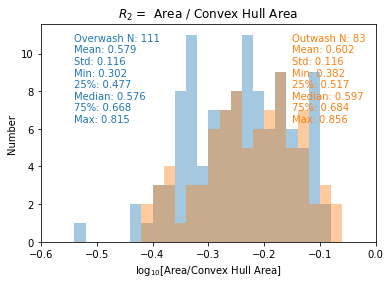

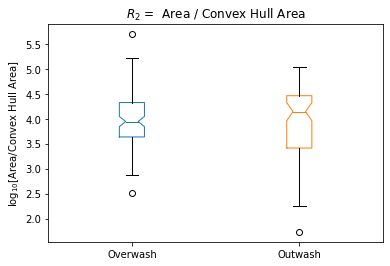

In [19]:
title='$R_2$ =  Area / Convex Hull Area'
figname = 'R2_area_over_convex_hull_area.svg'
colnamef = 'R2'
colnamed = 'R2'
dataf = np.log10(dbf[colnamef].values)
datad = np.log10(dbd[colnamed].values)

u, p = stats.mannwhitneyu(dataf, datad)
print('Null hypothesis that distributions are equal can be rejected if p is small.')
print('p = {:.3f}'.format(p))

fig, ax1 = plt.subplots(ncols=1)
bins = np.arange(-.56,-.04,.02)
_ = ax1.hist(dataf, bins=bins, histtype='stepfilled', alpha=0.4)
_ = ax1.hist(datad, bins=bins, histtype='stepfilled', alpha=0.4)

ts = "Overwash N: {:.0f}\nMean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\n25%: {:.3f}\nMedian: {:.3f}\n75%: {:.3f}\nMax: {:.3f}".format(\
    dbfs[colnamef]['count'],dbfs[colnamef]['mean'],dbfs[colnamef]['std'],\
    dbfs[colnamef]['min'],dbfs[colnamef]['25%'],dbfs[colnamef]['50%'],dbfs[colnamef]['75%'],dbfs[colnamef]['max'])
ts2 = "Outwash N: {:.0f}\nMean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\n25%: {:.3f}\nMedian: {:.3f}\n75%: {:.3f}\nMax: {:.3f}".format(\
    dbds[colnamed]['count'],dbds[colnamed]['mean'],dbds[colnamed]['std'],
    dbds[colnamed]['min'],dbds[colnamed]['25%'],dbds[colnamed]['50%'],dbds[colnamed]['75%'],dbds[colnamed]['max'])
ax1.text(x=.1, y=.55, s=ts, fontsize=10, c='tab:blue',transform=ax1.transAxes)
ax1.text(x=.75, y=.55, s=ts2, fontsize=10, c='tab:orange',transform=ax1.transAxes)
plt.title(title)
plt.xlim((-.6,0))
plt.ylabel('Number')
plt.xlabel('log$_{10}$[Area/Convex Hull Area]')
plt.savefig(outdir+'hist_'+figname,dpi=200)

boxfix, ax = plt.subplots(1,1,sharey=True)
bp=ax.boxplot((data,data2),notch=True)
plt.setp(bp['boxes'][0], color='tab:blue')
plt.setp(bp['medians'][0], color='tab:blue')

plt.setp(bp['boxes'][1], color='tab:orange')
plt.setp(bp['medians'][1], color='tab:orange')

ax.set_xticklabels(('Overwash','Outwash'))
ax.set_ylabel('log$_{10}$[Area/Convex Hull Area]')
plt.title(title)
plt.savefig(outdir+'box_'+figname,dpi=200)

#### Are R1 and R2 correlated? Not really

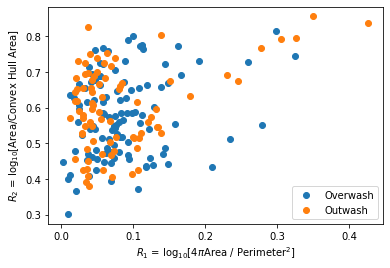

In [20]:
plt.plot(dbf['R1'],dbf['R2'],'o',label='Overwash')
plt.plot(dbd['R1'],dbd['R2'],'o',label='Outwash')
plt.ylabel('$R_2$ = log$_{10}$[Area/Convex Hull Area]')
plt.xlabel('$R_1$ = log$_{10}$[4$\pi$Area / Perimeter$^2$]')
_=plt.legend()
plt.savefig(outdir+'R1_R2_scatter.svg',dpi=200)

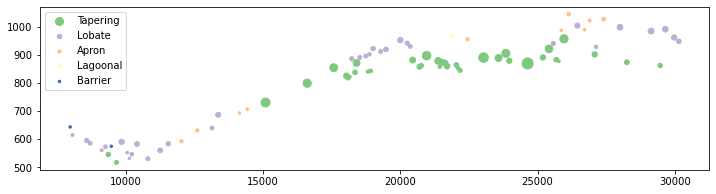

In [21]:
tapering = dbd.loc[dbd['Type'] == 1]['Shape_Area'].values
lobate = dbd.loc[dbd['Type'] == 2]['Shape_Area'].values
apron = dbd.loc[dbd['Type'] == 3]['Shape_Area'].values
lagoonal = dbd.loc[dbd['Type'] == 4]['Shape_Area'].values
barrier = dbd.loc[dbd['Type'] == 5]['Shape_Area'].values

x1,y1 = UTM2Island(dbd.loc[dbd['Type'] == 1]['CENTROID_X'].values, dbd.loc[dbd['Type'] == 1]['CENTROID_Y'].values )
x2,y2 = UTM2Island(dbd.loc[dbd['Type'] == 2]['CENTROID_X'].values, dbd.loc[dbd['Type'] == 2]['CENTROID_Y'].values )
x3,y3 = UTM2Island(dbd.loc[dbd['Type'] == 3]['CENTROID_X'].values, dbd.loc[dbd['Type'] == 3]['CENTROID_Y'].values )
x4,y4 = UTM2Island(dbd.loc[dbd['Type'] == 4]['CENTROID_X'].values, dbd.loc[dbd['Type'] == 4]['CENTROID_Y'].values )
x5,y5 = UTM2Island(dbd.loc[dbd['Type'] == 5]['CENTROID_X'].values, dbd.loc[dbd['Type'] == 5]['CENTROID_Y'].values )

cols=['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0']

# scale by area
ascaled = lambda a: 6.*np.sqrt(a)/(np.min(np.sqrt(a)))

plt.figure(figsize=(12,3))
plt.scatter(x1,y1,s=ascaled(tapering),c=cols[0],label='Tapering')
plt.scatter(x2,y2,s=ascaled(lobate),c=cols[1],label='Lobate')
plt.scatter(x3,y3,s=ascaled(apron),c=cols[2],label='Apron')
plt.scatter(x4,y4,s=ascaled(lagoonal),c=cols[3],label='Lagoonal')
plt.scatter(x5,y5,s=ascaled(barrier),c=cols[4],label='Barrier')
plt.legend()

         N  median
  tapering: 37  0.106
  lobate:  33 0.043
  apron:   10 0.035
Null hypothesis that lobate and tapering distributions are equal can be rejected if p is small.
p = 0.000033
Null hypothesis that tapering and apron distributions are equal can be rejected if p is small.
p = 0.000156


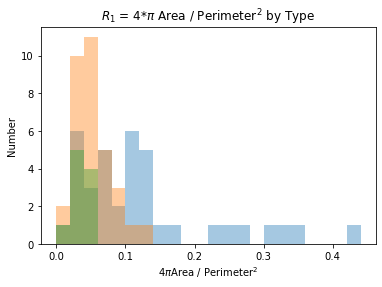

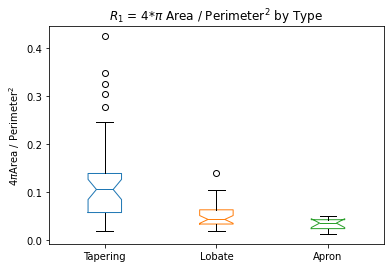

In [26]:
title='$R_1$ = 4*$\pi$ Area / Perimeter$^2$ by Type'
figname = 'R1_area_over_perimeter2_by_type.svg'
# tapering = np.log10(dbd.loc[dbd['Type'] == 1]['R1'].values)
# lobate = np.log10(dbd.loc[dbd['Type'] == 2]['R1'].values)
# apron = np.log10(dbd.loc[dbd['Type'] == 3]['R1'].values)
# lagoonal = np.log10(dbd.loc[dbd['Type'] == 4]['R1'].values)
# barrier = np.log10(dbd.loc[dbd['Type'] == 5]['R1'].values)
tapering = (dbd.loc[dbd['Type'] == 1]['R1'].values)
lobate = (dbd.loc[dbd['Type'] == 2]['R1'].values)
apron = (dbd.loc[dbd['Type'] == 3]['R1'].values)
lagoonal = (dbd.loc[dbd['Type'] == 4]['R1'].values)
barrier = (dbd.loc[dbd['Type'] == 5]['R1'].values)

print('         N  median\n  tapering: {}  {:.3f}\n  lobate:  {} {:.3f}\n  apron:   {} {:.3f}'.format(\
    len(tapering),np.median(tapering),\
    len(lobate),np.median(lobate),\
    len(apron),np.median(apron)                               ))

u, p = stats.mannwhitneyu(lobate, tapering)
print('Null hypothesis that lobate and tapering distributions are equal can be rejected if p is small.')
print('p = {:f}'.format(p))
u, p = stats.mannwhitneyu(tapering, apron)
print('Null hypothesis that tapering and apron distributions are equal can be rejected if p is small.')
print('p = {:f}'.format(p))

fig, ax1 = plt.subplots(ncols=1)

#bins = 15
bins = np.arange(0.,.46,.02)
_ = ax1.hist(tapering, bins=bins, histtype='stepfilled', linewidth=3, alpha=0.4)
_ = ax1.hist(lobate, bins=bins, histtype='stepfilled', linewidth=3, alpha=0.4)
_ = ax1.hist(apron, bins=bins, histtype='stepfilled', linewidth=3, alpha=0.4)

plt.title(title)
#plt.xlim((-.6,0))
plt.ylabel('Number')
#plt.xlabel('log$_{10}$[4$\pi$Area / Perimeter$^2$]')
plt.xlabel('4$\pi$Area / Perimeter$^2$')

plt.savefig(outdir+'hist_'+figname,dpi=200)

boxfix, ax = plt.subplots(1,1,sharey=True)
bp=ax.boxplot((tapering,lobate,apron),notch=True)
plt.setp(bp['boxes'][0], color='tab:blue')
plt.setp(bp['medians'][0], color='tab:blue')

plt.setp(bp['boxes'][1], color='tab:orange')
plt.setp(bp['medians'][1], color='tab:orange')

plt.setp(bp['boxes'][2], color='tab:green')
plt.setp(bp['medians'][2], color='tab:green')

ax.set_xticklabels(('Tapering','Lobate','Apron'))
ax.set_ylabel('4$\pi$Area / Perimeter$^2$')
plt.title(title)
plt.savefig(outdir+'box_'+figname,dpi=200)

Null hypothesis that lobate and tapering distributions are equal can be rejected if p is small.
p = 0.001


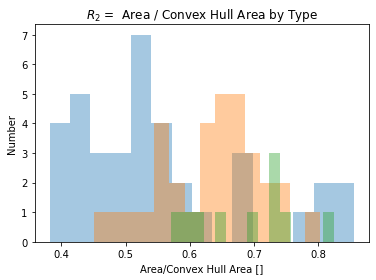

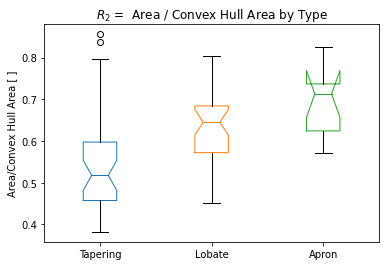

In [23]:
title='$R_2$ =  Area / Convex Hull Area by Type'
figname = 'R2_area_over_convex_hull_area_by_type.svg'
# tapering = np.log10(dbd.loc[dbd['Type'] == 1]['R2'].values)
# lobate = np.log10(dbd.loc[dbd['Type'] == 2]['R2'].values)
# apron = np.log10(dbd.loc[dbd['Type'] == 3]['R2'].values)
# lagoonal = np.log10(dbd.loc[dbd['Type'] == 4]['R2'].values)
# barrier = np.log10(dbd.loc[dbd['Type'] == 5]['R2'].values)

tapering = (dbd.loc[dbd['Type'] == 1]['R2'].values)
lobate = (dbd.loc[dbd['Type'] == 2]['R2'].values)
apron = (dbd.loc[dbd['Type'] == 3]['R2'].values)
lagoonal = (dbd.loc[dbd['Type'] == 4]['R2'].values)
barrier = (dbd.loc[dbd['Type'] == 5]['R2'].values)

u, p = stats.mannwhitneyu(lobate, tapering)
print('Null hypothesis that lobate and tapering distributions are equal can be rejected if p is small.')
print('p = {:.3f}'.format(p))

fig, ax1 = plt.subplots(ncols=1)

bins = 15
_ = ax1.hist(tapering, bins=bins, histtype='stepfilled', linewidth=3, alpha=0.4)
_ = ax1.hist(lobate, bins=bins, histtype='stepfilled', linewidth=3, alpha=0.4)
_ = ax1.hist(apron, bins=bins, histtype='stepfilled', linewidth=3, alpha=0.4)

plt.title(title)
#plt.xlim((-.6,0))
plt.ylabel('Number')
plt.xlabel('Area/Convex Hull Area []')
plt.savefig(outdir+'hist_'+figname,dpi=200)

boxfix, ax = plt.subplots(1,1,sharey=True)
bp=ax.boxplot((tapering,lobate,apron),notch=True)
plt.setp(bp['boxes'][0], color='tab:blue')
plt.setp(bp['medians'][0], color='tab:blue')

plt.setp(bp['boxes'][1], color='tab:orange')
plt.setp(bp['medians'][1], color='tab:orange')

plt.setp(bp['boxes'][2], color='tab:green')
plt.setp(bp['medians'][2], color='tab:green')

ax.set_xticklabels(('Tapering','Lobate','Apron'))
ax.set_ylabel('Area/Convex Hull Area [ ]')
plt.title(title)
plt.savefig(outdir+'box_'+figname,dpi=200)

#### I don't understand these metrics.

0.746679810018114
0.7740510189649935


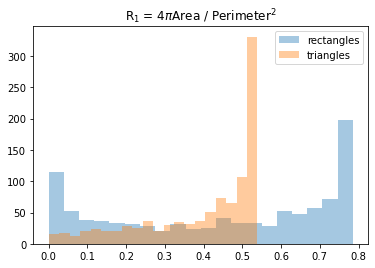

In [24]:
h = np.random.random_sample(1000)
l = 1/h
#l = np.random.random_sample(1000)
bins = 20

#rectangles
A = h*l
Ps2 = (2*h+2*l)**2
R1s = A/Ps2
plt.hist(((4*np.pi*R1s)), bins=bins, histtype='stepfilled', linewidth=3, alpha=0.4, label='rectangles')

#triangles
a = np.random.random_sample(1000)
b = np.random.random_sample(1000)
c = np.sqrt(a**2+b**2)
Pt = a+b+c
Pt2 = Pt**2
s = Pt/2
At = np.sqrt(s*(s-a)*(s-b)*(s-c))
R1t = At/Pt2
_ = plt.hist(((4*np.pi*R1t)), bins=bins, histtype='stepfilled', linewidth=3, alpha=0.4, label='triangles')
_ = plt.legend()
_ = plt.title('R$_1$ = 4$\pi$Area / Perimeter$^2$')

# half circles
r = 1
Ac = 0.5*np.pi*r**2
Pc = np.pi*r+2*r
Pc2 = Pc**2
R1c = Ac/Pc2
print(4*np.pi*R1c)

# quarter circle
Ac = 0.25*np.pi*r**2
Pc = 0.25*2.*np.pi*r+2*r
Pc2 = Pc**2
R1c = Ac/Pc2
print(4*np.pi*R1c)


0.7853981633974483


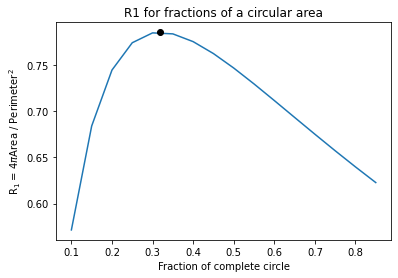

In [25]:
def r1circle(f):
    r=1
    Ac = f*np.pi*r**2
    Pc = f*2.*np.pi*r+2*r
    Pc2 = Pc**2
    R1c = Ac/Pc2
    return R1c
    
f = np.arange(.1,.9,.05)
plt.plot(f,4*np.pi*r1circle(f))
f = 1./np.pi
plt.plot(f,4*np.pi*r1circle(f),'ok')
print(4*np.pi*r1circle(f))
plt.title('R1 for fractions of a circular area')
_ = plt.ylabel('R$_1$ = 4$\pi$Area / Perimeter$^2$')
_ = plt.xlabel('Fraction of complete circle')